In [18]:
import yfinance as yf
import pandas as pd
import numpy as np

In [19]:
df=yf.download('BTC-USD',start='2015-01-01')
df

C:\Users\user\AppData\Local\Temp\ipykernel_13156\170512512.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download('BTC-USD',start='2015-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800
...,...,...,...,...,...
2025-07-28,117924.476562,119819.789062,117441.437500,119457.523438,64822943193
2025-07-29,117922.148438,119273.867188,116987.367188,117938.585938,68463107433


In [20]:
df.columns =[col[0] if isinstance(col, tuple) else col for col in df.columns]
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [21]:
df['ret']=df.Close.pct_change()
df

,Close,High,Low,Open,Volume,ret
Date,,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550,NaN
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,0.002492
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,-0.107767
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,-0.060079
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,0.038907
...,...,...,...,...,...,...
2025-07-28,117924.476562,119819.789062,117441.437500,119457.523438,64822943193,-0.012759
2025-07-29,117922.148438,119273.867188,116987.367188,117938.585938,68463107433,-0.000020
2025-07-30,117831.187500,118780.726562,115800.828125,117921.992188,68896148592,-0.000771


In [22]:
df=df.dropna()
df

,Close,High,Low,Open,Volume,ret
Date,,,,,,
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,0.002492
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,-0.107767
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,-0.060079
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,0.038907
2015-01-06,286.188995,287.553009,272.696014,274.610992,23245700,0.042682
...,...,...,...,...,...,...
2025-07-28,117924.476562,119819.789062,117441.437500,119457.523438,64822943193,-0.012759
2025-07-29,117922.148438,119273.867188,116987.367188,117938.585938,68463107433,-0.000020
2025-07-30,117831.187500,118780.726562,115800.828125,117921.992188,68896148592,-0.000771


In [23]:
np.percentile(df.ret,10)

np.float64(-0.033804450449895614)

In [24]:
low_thresh=np.percentile(df.ret,10)
high_thresh=np.percentile(df.ret,90)

In [25]:
df['signal']=np.where(df.ret<=low_thresh,1,np.where(df.ret>=high_thresh,-1,0))
df

C:\Users\user\AppData\Local\Temp\ipykernel_13156\4179069523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal']=np.where(df.ret<=low_thresh,1,np.where(df.ret>=high_thresh,-1,0))


,Close,High,Low,Open,Volume,ret,signal
Date,,,,,,,
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,0.002492,0
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,-0.107767,1
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,-0.060079,1
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,0.038907,0
2015-01-06,286.188995,287.553009,272.696014,274.610992,23245700,0.042682,-1
...,...,...,...,...,...,...,...
2025-07-28,117924.476562,119819.789062,117441.437500,119457.523438,64822943193,-0.012759,0
2025-07-29,117922.148438,119273.867188,116987.367188,117938.585938,68463107433,-0.000020,0
2025-07-30,117831.187500,118780.726562,115800.828125,117921.992188,68896148592,-0.000771,0


In [26]:
df['next_d_ret']=df.ret.shift(-1)
df

C:\Users\user\AppData\Local\Temp\ipykernel_13156\4206609280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_d_ret']=df.ret.shift(-1)


,Close,High,Low,Open,Volume,ret,signal,next_d_ret
Date,,,,,,,,
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650,0.002492,0,-0.107767
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400,-0.107767,1,-0.060079
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100,-0.060079,1,0.038907
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800,0.038907,0,0.042682
2015-01-06,286.188995,287.553009,272.696014,274.610992,23245700,0.042682,-1,0.028471
...,...,...,...,...,...,...,...,...
2025-07-28,117924.476562,119819.789062,117441.437500,119457.523438,64822943193,-0.012759,0,-0.000020
2025-07-29,117922.148438,119273.867188,116987.367188,117938.585938,68463107433,-0.000020,0,-0.000771
2025-07-30,117831.187500,118780.726562,115800.828125,117921.992188,68896148592,-0.000771,0,-0.017593


In [27]:
low_ret_grp=(df[df.signal==1]['next_d_ret'])
High_ret_grp=(df[df.signal==-1]['next_d_ret'])

In [28]:
low_ret_grp

Date
2015-01-03   -0.060079
2015-01-04    0.038907
2015-01-08    0.024913
2015-01-10   -0.033246
2015-01-13   -0.211449
                ...   
2025-03-09   -0.025670
2025-04-06    0.013052
2025-04-08    0.082625
2025-04-10    0.047455
2025-05-23    0.004692
Name: next_d_ret, Length: 387, dtype: float64

In [29]:
low_ret_grp.mean()

np.float64(0.0034792494520983134)

In [30]:
High_ret_grp.mean()

np.float64(0.0021353573615782158)

<Axes: xlabel='Date'>

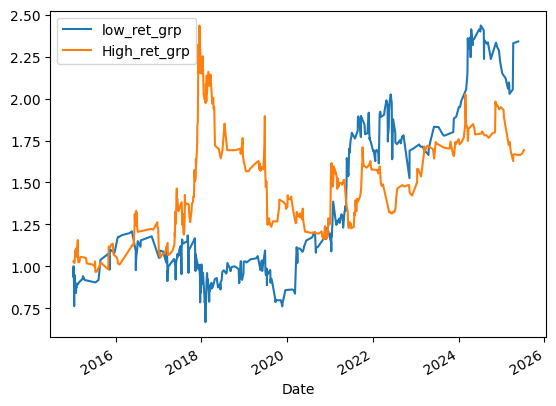

In [31]:
(low_ret_grp+1).cumprod().plot(label='low_ret_grp',legend=True)
(High_ret_grp+1).cumprod().plot(label='High_ret_grp',legend=True)


<Axes: xlabel='Date'>

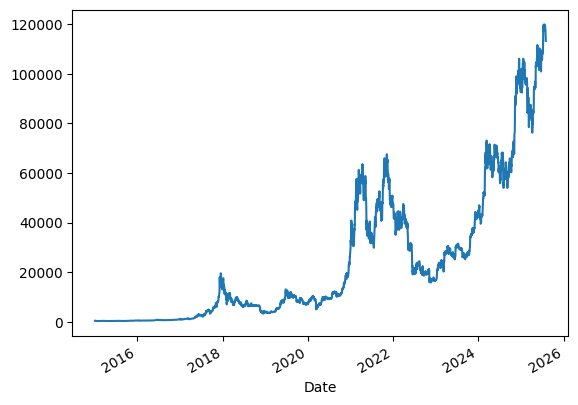

In [32]:
df.Close.plot()

In [33]:
(low_ret_grp+1).cumprod()

Date
2015-01-03    0.939921
2015-01-04    0.976491
2015-01-08    1.000818
2015-01-10    0.967544
2015-01-13    0.762958
                ...   
2025-03-09    2.027849
2025-04-06    2.054316
2025-04-08    2.224055
2025-04-10    2.329598
2025-05-23    2.340528
Name: next_d_ret, Length: 387, dtype: float64

In [34]:
(High_ret_grp+1).cumprod()

Date
2015-01-06    1.028471
2015-01-15    1.019909
2015-01-18    1.041835
2015-01-21    1.071722
2015-01-24    1.097109
                ...   
2025-04-22    1.668962
2025-05-08    1.664587
2025-06-09    1.664031
2025-06-23    1.671405
2025-07-10    1.693450
Name: next_d_ret, Length: 387, dtype: float64